In [144]:
# Load all necessary packages
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv('degrees-that-pay-back.csv')
data.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


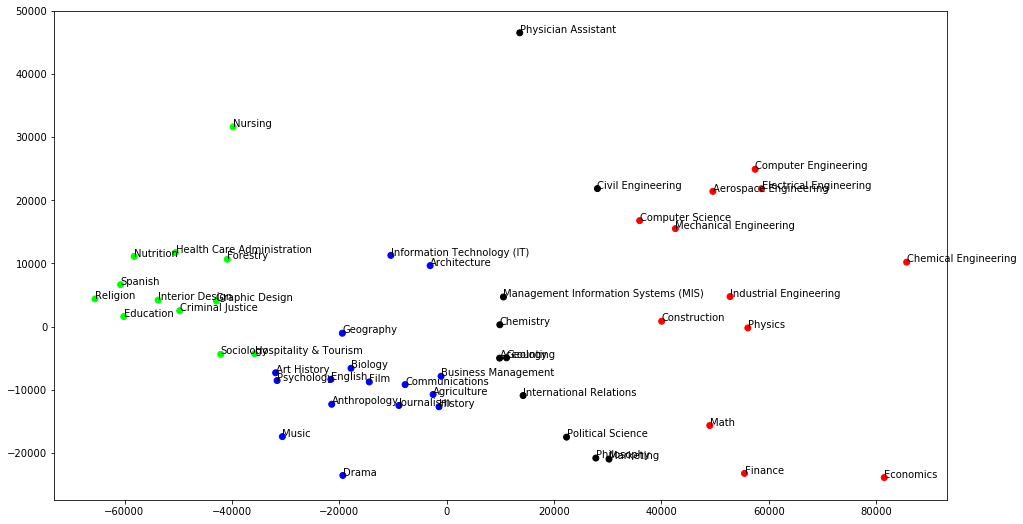

In [153]:
data_matrix = np.array(data[data.columns[1:]].replace('[\$,]', '', regex=True).astype(float))
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(data_matrix)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_transform)
pca_transform.shape
data['class'] = kmeans.labels_
colormap = np.array(['red', 'lime', 'black', 'blue'])
plt.figure(figsize=(16,9))
plt.scatter(pca_transform[:,0], pca_transform[:,1], c=colormap[kmeans.labels_])
for i, txt in enumerate(data.iloc[:,0]):
    plt.annotate(txt, (pca_transform[i,0], pca_transform[i,1]))
plt.show()

The plot above shows the end result. Now I will explain what I did.  Since there are a total of 7 different numerical variables for each college major (Starting Median Salary, Mid-Career Median Salary, Percent change from Starting to Mid-Career Salary, etc.), it would be impossible to plot all the categories.  Thus we reduce the dimensions down to 2 so it becomes easier to visualize.  I used a popular dimensionality reduction technique called PCA (principal component analysis), which projects the 7 dimensional data down into a 2 dimensional plane while attempting to keep the structure.  Then I clustered the points together into 4 groups using the simple yet popular K-Means algorithm, an alogorithm that tries to find natural clusters within our data.  Finally, we get the above results.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 3611.964701
[t-SNE] KL divergence after 75 iterations with early exaggeration: 1.115641
[t-SNE] Error after 100 iterations: 1.115641


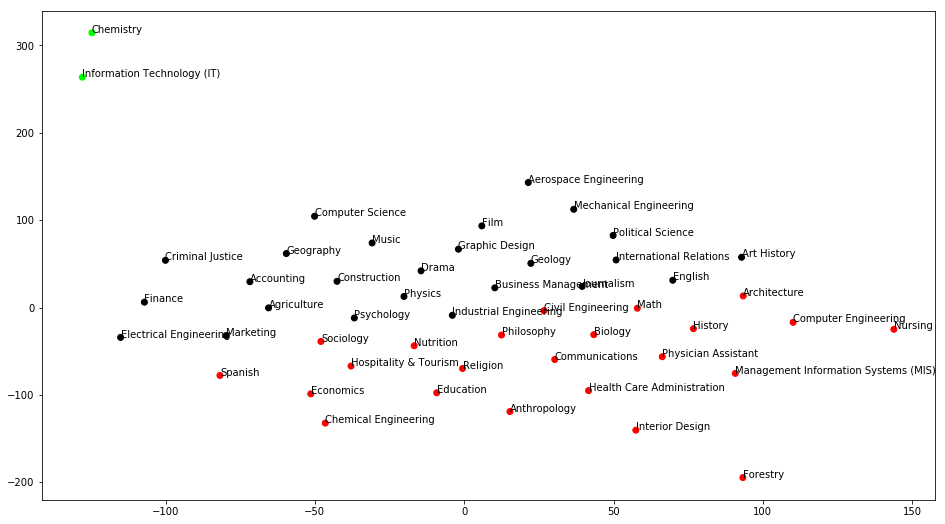

In [151]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(data_matrix)

kmeans2 = KMeans(n_clusters=3, random_state=0)
kmeans2.fit(tsne_results)
pca_transform.shape
colormap = np.array(['red', 'lime', 'black', 'blue'])
plt.figure(figsize=(16,9))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colormap[kmeans2.labels_])
for i, txt in enumerate(data.iloc[:,0]):
    plt.annotate(txt, (tsne_results[i,0], tsne_results[i,1]))
plt.show()

The above plot shows another transformation of our data but this time using the t-distributed Stocastic Neighbor Embedding (t-SE) technique.  Unlike PCA, which is merely a projection (if you took linear algebra, you would know that a projection is just a linear transformation which makes it nearly impossible to preserve highly nonlinear structure in our data), t-SNE is a nonlinear dimensionality reduction technique and thus effectively preserves nonlinear structure in the data.  However, it seems that t-SNE did not perform as well as PCA did on this dataset, so we will just stick with PCA for this project.

In [155]:
data[data['class'] == 0]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,class
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00",0
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00",0
12,Computer Engineering,"$61,400.00","$105,000.00",71.0,"$66,100.00","$84,100.00","$135,000.00","$162,000.00",0
13,Computer Science,"$55,900.00","$95,500.00",70.8,"$56,000.00","$74,900.00","$122,000.00","$154,000.00",0
14,Construction,"$53,700.00","$88,900.00",65.5,"$56,300.00","$68,100.00","$118,000.00","$171,000.00",0
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00",0
19,Electrical Engineering,"$60,900.00","$103,000.00",69.1,"$69,300.00","$83,800.00","$130,000.00","$168,000.00",0
22,Finance,"$47,900.00","$88,300.00",84.3,"$47,200.00","$62,100.00","$128,000.00","$195,000.00",0
30,Industrial Engineering,"$57,700.00","$94,700.00",64.1,"$57,100.00","$72,300.00","$132,000.00","$173,000.00",0
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00",0


In [156]:
data[data['class'] == 1]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,class
15,Criminal Justice,"$35,000.00","$56,300.00",60.9,"$32,200.00","$41,600.00","$80,700.00","$107,000.00",1
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00",1
23,Forestry,"$39,100.00","$62,600.00",60.1,"$41,000.00","$49,300.00","$78,200.00","$111,000.00",1
26,Graphic Design,"$35,700.00","$59,800.00",67.5,"$36,000.00","$45,500.00","$80,800.00","$112,000.00",1
27,Health Care Administration,"$38,800.00","$60,600.00",56.2,"$34,600.00","$45,600.00","$78,800.00","$101,000.00",1
29,Hospitality & Tourism,"$37,800.00","$57,500.00",52.1,"$35,500.00","$43,600.00","$81,900.00","$124,000.00",1
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00",1
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00",1
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00",1
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00",1


In [157]:
data[data['class'] == 2]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,class
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00",2
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00",2
10,Civil Engineering,"$53,900.00","$90,500.00",67.9,"$63,400.00","$75,100.00","$115,000.00","$148,000.00",2
25,Geology,"$43,500.00","$79,500.00",82.8,"$45,000.00","$59,600.00","$101,000.00","$156,000.00",2
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00",2
35,Management Information Systems (MIS),"$49,200.00","$82,300.00",67.3,"$45,300.00","$60,500.00","$108,000.00","$146,000.00",2
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00",2
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00",2
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00",2
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00",2


In [158]:
data[data['class'] == 3]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,class
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00",3
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00",3
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00",3
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00",3
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00",3
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00",3
11,Communications,"$38,100.00","$70,000.00",83.7,"$37,500.00","$49,700.00","$98,800.00","$143,000.00",3
16,Drama,"$35,900.00","$56,900.00",58.5,"$36,700.00","$41,300.00","$79,100.00","$153,000.00",3
20,English,"$38,000.00","$64,700.00",70.3,"$33,400.00","$44,800.00","$93,200.00","$133,000.00",3
21,Film,"$37,900.00","$68,500.00",80.7,"$33,900.00","$45,500.00","$100,000.00","$136,000.00",3
